In [29]:
import qiskit as q
%matplotlib inline
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram
from matplotlib import style
style.use("dark_background")
import math

In [10]:
statevec_simulator = q.Aer.get_backend("statevector_simulator")
qasm_sim = q.Aer.get_backend('qasm_simulator')

def do_job(circuit):
    job = q.execute(circuit, backend=statevec_simulator)
    result = job.result()
    statevec = result.get_statevector()
    
    n_qubits = circuit.num_qubits
    circuit.measure([i for i in range(n_qubits)], [i for i in range(n_qubits)])
    
    qasm_job = q.execute(circuit, backend=qasm_sim, shots=1024).result()
    counts = qasm_job.get_counts()
    
    return statevec, counts

In [16]:
circuit = q.QuantumCircuit(2,2)  # 2 qubits, 2 classical bits 
statevec, counts = do_job(circuit)
circuit.draw()

┌─┐   
q_0: ┤M├───
     └╥┘┌─┐
q_1: ─╫─┤M├
      ║ └╥┘
c: 2/═╩══╩═
      0  1

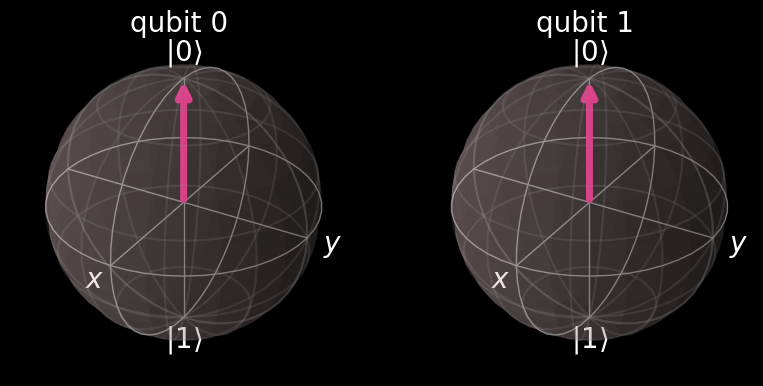

In [17]:
plot_bloch_multivector(statevec)

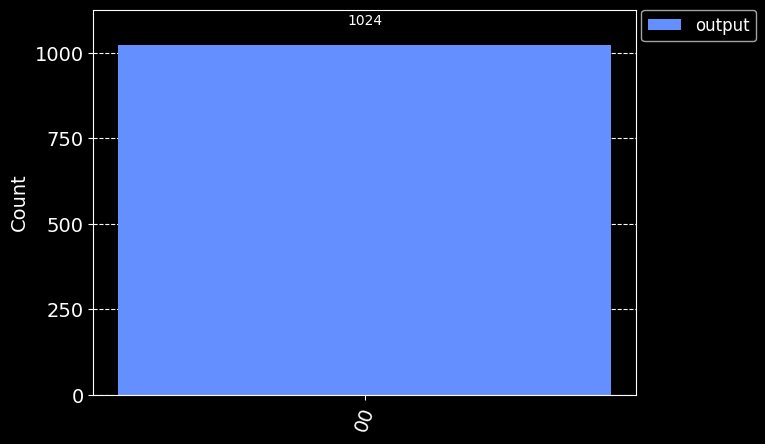

In [12]:
plot_histogram([counts], legend=["output"])

In [18]:
circuit = q.QuantumCircuit(2,2)  # 2 qubits, 2 classical bits 
circuit.h(1)
statevec, counts = do_job(circuit)
circuit.draw()

┌─┐   
q_0: ─────┤M├───
     ┌───┐└╥┘┌─┐
q_1: ┤ H ├─╫─┤M├
     └───┘ ║ └╥┘
c: 2/══════╩══╩═
           0  1

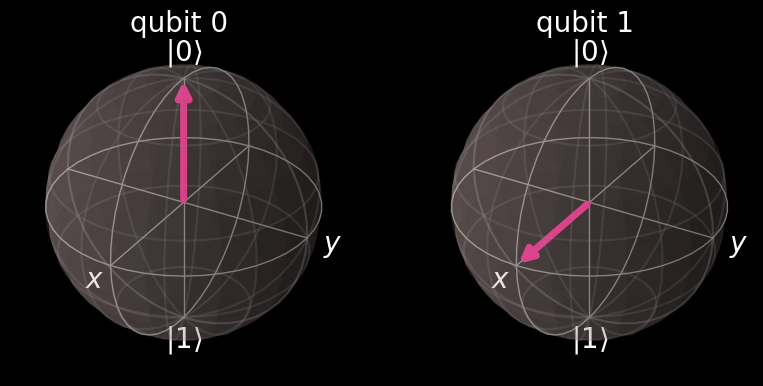

In [14]:
plot_bloch_multivector(statevec)

In [21]:
circuit = q.QuantumCircuit(2,2)  # 2 qubits, 2 classical bits 
circuit.h(0)
circuit.cx(0,1)
statevec, counts = do_job(circuit)
circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

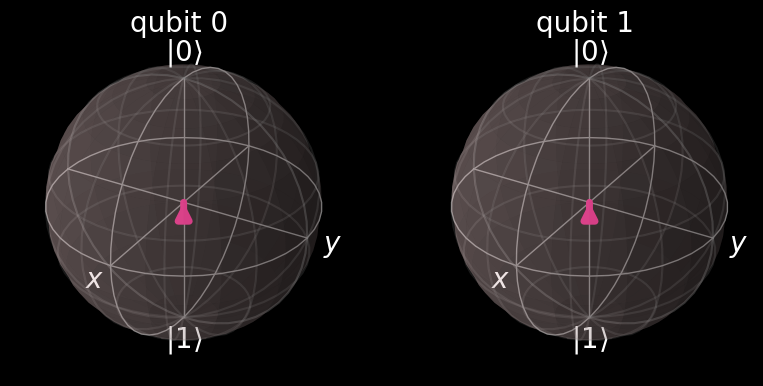

In [22]:
plot_bloch_multivector(statevec)

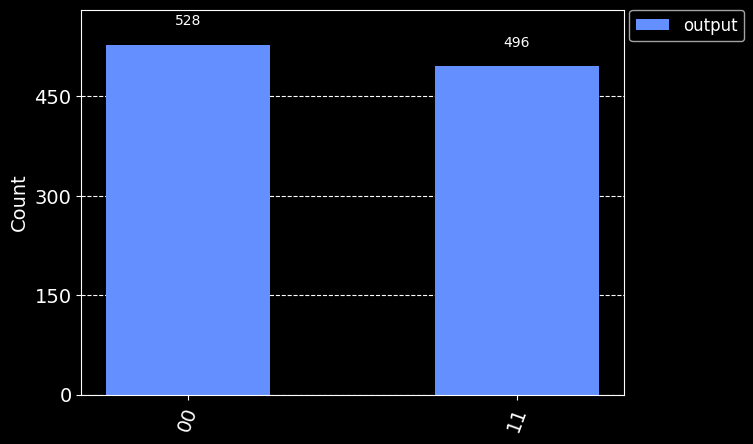

In [24]:
plot_histogram([counts], legend=["output"])

In [25]:
circuit = q.QuantumCircuit(3,3)  # 2 qubits, 2 classical bits 
circuit.h(0)
circuit.h(1)
circuit.ccx(0,1,2)
circuit.draw()

┌───┐     
q_0: ┤ H ├──■──
     ├───┤  │  
q_1: ┤ H ├──■──
     └───┘┌─┴─┐
q_2: ─────┤ X ├
          └───┘
c: 3/══════════

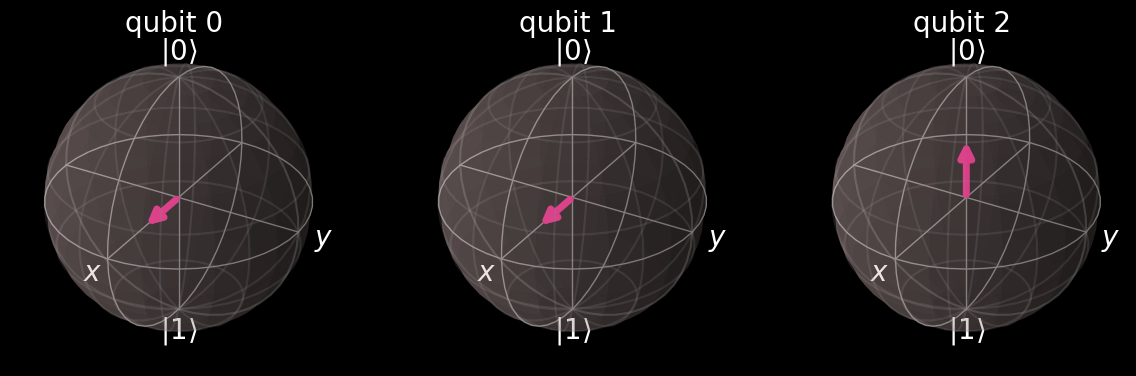

In [26]:
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

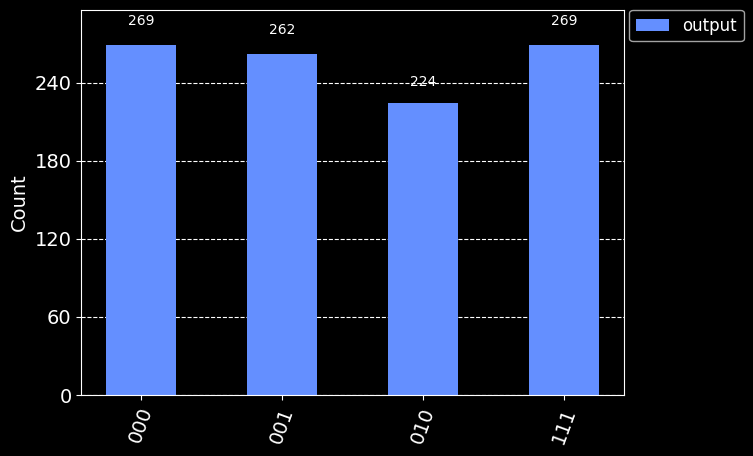

In [27]:
plot_histogram([counts], legend=["output"])

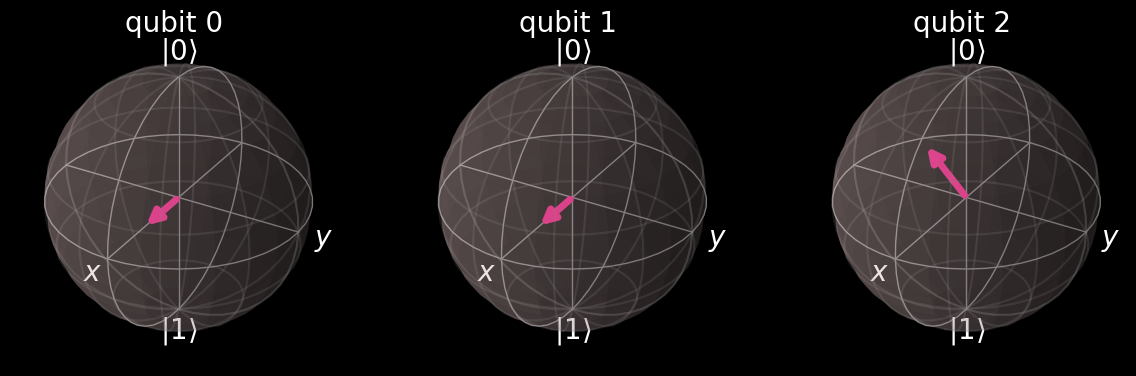

In [31]:
circuit = q.QuantumCircuit(3,3)  # even-sized registers again so we can use our function
circuit.h(0)  # hadamard
circuit.h(1)  # hadamard
circuit.ccx(0,1,2)  # controlled controlled not
circuit.rx(math.pi/4, 2)

statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

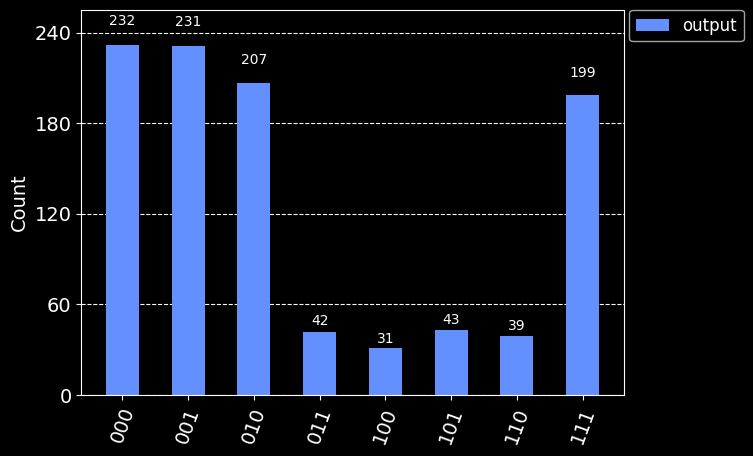

In [32]:
plot_histogram([counts], legend=["output"])